In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
print('+---------------------------------+')
print('|  STRING FROM GRAMMAR GENERATOR  |')
print('|          G = (N,Ʃ,P,S)          |')
print('|                                 |')
print('| N - nonterminal symbols         |')
print('| Ʃ - terminal symbols            |')
print('| P - production rules            |')
print('| S - start symbol                |')
print('+---------------------------------+')

+---------------------------------+
|  STRING FROM GRAMMAR GENERATOR  |
|          G = (N,Ʃ,P,S)          |
|                                 |
| N - nonterminal symbols         |
| Ʃ - terminal symbols            |
| P - production rules            |
| S - start symbol                |
+---------------------------------+


In [3]:
terminal_symbols = []
aux = ''
aux = input('Set terminal symbols [Ʃ] (type "next" to next step):')
while (aux != 'next'):
    output = ''
    terminal_symbols.append(aux)
    output += 'Ʃ = {'
    for x in terminal_symbols:
        output += x + ', '
    output = output[:(len(output) - 2)]
    output += '}'
    print(output)
    aux = input()

Set terminal symbols [Ʃ] (type "next" to next step):a
Ʃ = {a}
b
Ʃ = {a, b}
c
Ʃ = {a, b, c}
d
Ʃ = {a, b, c, d}
next


In [4]:
nonterminal_symbols = []
aux = input('Set nonterminal symbols [N] (type "next" to next step):')
while(aux != 'next'):
    output = ''
    nonterminal_symbols.append(aux)
    output += 'N = {'
    for x in nonterminal_symbols:
        output += x + ', '
    output = output[:(len(output) - 2)]
    output += '}'
    print(output)
    aux = input()

Set nonterminal symbols [N] (type "next" to next step):S
N = {S}
A
N = {S, A}
B
N = {S, A, B}
C
N = {S, A, B, C}
next


In [5]:
start_symbol = ''
start_symbol = input('Set start symbol [S]:')

Set start symbol [S]:S


In [6]:
rules = []
aux = input('Set productions rules [P] (type "next" for next step):')
while (aux != 'next'):
    output = ''
    rules.append(aux)
    output += 'P = {\n'
    for x in rules:
        output += '\t' + x + '\n'
    output += '}'
    print(output)
    aux = input()

Set productions rules [P] (type "next" for next step):S -> dA
P = {
	S -> dA
}
A -> d
P = {
	S -> dA
	A -> d
}
A -> aB
P = {
	S -> dA
	A -> d
	A -> aB
}
B -> bC
P = {
	S -> dA
	A -> d
	A -> aB
	B -> bC
}
C -> cA
P = {
	S -> dA
	A -> d
	A -> aB
	B -> bC
	C -> cA
}
C -> aS
P = {
	S -> dA
	A -> d
	A -> aB
	B -> bC
	C -> cA
	C -> aS
}
next


In [7]:
print('The grammer is:')
print('G(N,Ʃ,P,S)')

output = 'Ʃ = {'
for x in terminal_symbols:
    output += x + ', '
output = output[:(len(output) - 2)]
output += '}'
print(output)

output = 'N = {'
for x in nonterminal_symbols:
    output += x + ', '
output = output[:(len(output) - 2)]
output += '}'
print(output)

print('S = ' + start_symbol)

output = 'P = {\n'
for x in rules:
    output += '\t' + x + '\n'
output += '}'
print(output)

The grammer is:
G(N,Ʃ,P,S)
Ʃ = {a, b, c, d}
N = {S, A, B, C}
S = S
P = {
	S -> dA
	A -> d
	A -> aB
	B -> bC
	C -> cA
	C -> aS
}


In [8]:
check_string = ''
check_string = input('Set the string to be checked (type "next" for next step):')

Set the string to be checked (type "next" for next step):dabadabcd


In [9]:
#Gramatica de la toate variantele de la laboratorul 1 sunt de tip 3
rules_dic = {}
for rule in rules:
    if rule[-1] in terminal_symbols:
        rule = list(rule)
        rule += '$'
        "".join(rule)
    if ord(rule[0]) - 65 not in rules_dic:
        rules_dic[ord(rule[0])-65] = []
    rules_dic[ord(rule[0])-65] = list(rules_dic[ord(rule[0])-65])
    rules_dic[ord(rule[0])-65].insert(len(rules_dic[ord(rule[0])-65]),
                                          (rule[-2], rule[-1]))
    rules_dic[ord(rule[0])-65] = tuple(rules_dic[ord(rule[0])-65])
print(rules_dic[0])
print(rules_dic[1])
print(rules_dic[2])
print(rules_dic[18])

(('d', '$'), ('a', 'B'))
(('b', 'C'),)
(('c', 'A'), ('a', 'S'))
(('d', 'A'),)


In [10]:
current_symbol = start_symbol
current_word = ''
nr_ord_word = 0
total_words = 1
words = []
aux = ''

words = list(words)
words.insert(0, ('', start_symbol))
words = tuple(words)

is_working = True
while (is_working and nr_ord_word < total_words):
    current_word, current_symbol = words[nr_ord_word]
    for rule in rules_dic[ord(current_symbol) - 65]:
        add_to_string, next_symbol = rule
        #print(current_word + ' ' + current_symbol + ' ' + add_to_string + ' ' + next_symbol)
        aux = current_word
        aux += add_to_string
        if (aux == check_string and next_symbol == '$'):
            print('YES')
            is_working = False
        if(len(aux) < len(check_string) and aux in check_string):
            words = list(words)
            words.insert(total_words, (aux, next_symbol))
            words = tuple(words)
            total_words += 1
    nr_ord_word += 1
    while(nr_ord_word < total_words and words[nr_ord_word][1] == '$'):
        nr_ord_word += 1
if(is_working):
    print('NO')

YES


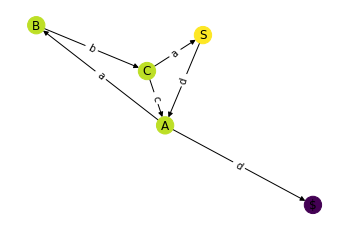

In [25]:
G = nx.DiGraph()

for node in nonterminal_symbols:
    for rule in rules_dic[ord(node) - 65]:
        terminal_symbol, next_node = rule
        G.add_edges_from([(node, next_node)], label = terminal_symbol)

val_map = {}
val_map[start_symbol] = 0.9
val_map['$'] = 0.0
for node in nonterminal_symbols:
    val_map[start_symbol] = 0.5
    
values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels = dict([((u, v, ),d['label']) for u,v,d in G.edges(data = True)])
edge_colors = ['black' for edge in G.edges()]

pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
node_labels = {node:node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)
nx.draw(G, pos, node_color = values, node_size = 300, edge_color = edge_colors,
        edge_cmap = plt.cm.Reds)

pylab.show()